In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import torch

In [3]:
x=np.loadtxt('ex4x.dat')
y=np.loadtxt('ex4y.dat')

In [4]:
ones=np.ones([x.shape[0],1])
x=np.concatenate((ones,x),axis=1)

In [5]:
X=torch.from_numpy(x.astype(np.float32))
Y=torch.from_numpy(y.astype(np.float32))

In [6]:
X

tensor([[ 1.0000, 55.5000, 69.5000],
        [ 1.0000, 41.0000, 81.5000],
        [ 1.0000, 53.5000, 86.0000],
        [ 1.0000, 46.0000, 84.0000],
        [ 1.0000, 41.0000, 73.5000],
        [ 1.0000, 51.5000, 69.0000],
        [ 1.0000, 51.0000, 62.5000],
        [ 1.0000, 42.0000, 75.0000],
        [ 1.0000, 53.5000, 83.0000],
        [ 1.0000, 57.5000, 71.0000],
        [ 1.0000, 42.5000, 72.5000],
        [ 1.0000, 41.0000, 80.0000],
        [ 1.0000, 46.0000, 82.0000],
        [ 1.0000, 46.0000, 60.5000],
        [ 1.0000, 49.5000, 76.0000],
        [ 1.0000, 41.0000, 76.0000],
        [ 1.0000, 48.5000, 72.5000],
        [ 1.0000, 51.5000, 82.5000],
        [ 1.0000, 44.5000, 70.5000],
        [ 1.0000, 44.0000, 66.0000],
        [ 1.0000, 33.0000, 76.5000],
        [ 1.0000, 33.5000, 78.5000],
        [ 1.0000, 31.5000, 72.0000],
        [ 1.0000, 33.0000, 81.5000],
        [ 1.0000, 42.0000, 59.5000],
        [ 1.0000, 30.0000, 64.0000],
        [ 1.0000, 61.0000, 45.0000],
 

In [7]:
Y

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
Y=Y.view(Y.shape[0],1)

In [9]:
Y.shape

torch.Size([80, 1])

In [11]:
n_samples,n_features=X.shape

In [14]:
class Model(nn.Module):
 
    def __init__(self,n_features): #initializing
        super(Model, self).__init__()
        self.linear = nn.Linear(n_features, 1)  # hidden layer
 
 
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [15]:
M=Model(n_features)

In [19]:
learining_rate=0.001
loss=nn.BCELoss()
optimizer=torch.optim.SGD(M.parameters(),lr=learining_rate)

In [20]:
los=[]
for epoch in range(100):
    y_pred=M(X)
    l=loss(y_pred,Y)
    los.append(l)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch %5==0:
        print(f'epoch:{epoch}, loss:{l.item():.3f}')

epoch:0, loss:24.077
epoch:5, loss:5.218
epoch:10, loss:3.000
epoch:15, loss:1.904
epoch:20, loss:1.875
epoch:25, loss:1.853
epoch:30, loss:1.827
epoch:35, loss:1.801
epoch:40, loss:1.780
epoch:45, loss:1.754
epoch:50, loss:1.731
epoch:55, loss:1.706
epoch:60, loss:1.683
epoch:65, loss:1.660
epoch:70, loss:1.635
epoch:75, loss:1.612
epoch:80, loss:1.589
epoch:85, loss:1.566
epoch:90, loss:1.542
epoch:95, loss:1.519


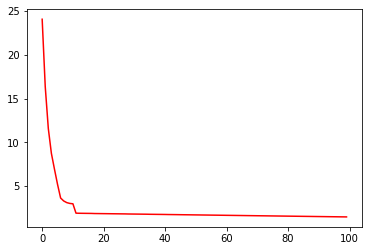

In [21]:
with torch.no_grad():
    plt.plot(los,'r')
    plt.show()